# 영상을 읽어오는 것과 만들어 보는 것

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import subprocess as sp
%matplotlib inline

In [7]:
def imshow(tit, image):
    plt.title(tit)
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap = 'gray')
    plt.show()

In [ ]:
img = cv2.imread('lenna.bmp')

if img is None:
    print('Image load failed!')
    


In [ ]:
# [[[]]]-> 3차원 객체 
print(img)

In [ ]:
print(img.shape) # 높이, 폭, 채널 수

# 통상적으로 OPENCV로 이미지를 나타낼때는, imgshow라는 함수가 있는데, 주피터 노트북에서는 사용할 수 없음.

In [ ]:
# 붉은색 -> 파란색 / 파란색 -> 붉은색 / RGB -> BGR
# openCV가 인식하는 컬러 시스템은 BGR channel임
plt.imshow(img)

In [ ]:
B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]
print(B.shape)

In [ ]:
plt.imshow(B, cmap = 'gray') # 칼라 매핑 테이블을 gray로 해야함

In [ ]:
RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB)
# 앞으로 주피터노트북으로 영상을 보여줄때는, 읽어오고 RGB로 변환해서 이미지를 보여줘야함.

In [ ]:
plt.imshow(R, cmap = 'gray')

# 255(회색) -> (255, 0, 0) 가장 밝은 빨강
# 127(회색) -> (127, 0 ,0) 중간 밝은 빨강

In [ ]:
RR = np.zeros(img.shape) # 기본적으로 numpy는 실수 타입

RR.shape
RR

In [ ]:
RR[:,:,0] = R / 255  # 0 - 255사이의 실수 // 첫번째 채널(R)만 R인 3차원 행렬 // 1보다크면 다 255로 보니까 0~1 사이로 바꿔줘야한다.

plt.imshow(RR) #  int 타입 -> 0~255 사이   //  실수 타입 ->  0 ~ 1 사이가 최대, 1보다 크면 다 255로 본다 따라서 255로 나눠줘야한다.
print(RR)

In [ ]:
import subprocess as sp
sever = sp.Popen("python image2.py", shell=True)

In [ ]:
%%writefile image2.py
img = cv2.imread('lenna.bmp')
R = img[:,:,2]
RR = np.zeros(img.shape)
RR[:,:,0] = R/255.0

cv2.imshow('src', img) 
cv2.imshow('dest', img)


cv2.waitKey()
cv2.destroyAllWindows()

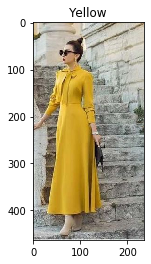

In [8]:
yellow = cv2.imread('yellow.jpg')
imshow('Yellow', yellow)

In [4]:
hsv = cv2.cvtColor(yellow, cv2.COLOR_RGB2HSV)
print(hsv.shape)
h = hsv[:,:,0]
s = hsv[:,:,1]
print(h.shape)

(463, 236, 3)
(463, 236)


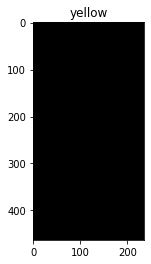

In [9]:
dest = yellow.copy()
for r in range(yellow.shape[0]):
    for c in range(yellow.shape[1]):
        if h[r,c] > 10 and h[r,c] < 50 and s[r,c]>= 170 and s[r,c]<230:
            dest[r,c,:] = [255,255,255]
        else:
            dest[r,c,:] = [0,0,0]

imshow("yellow", dest)

In [10]:
dest = yellow.copy()
for r in range(yellow.shape[0]):
    for c in range(yellow.shape[1]):
        if h[r,c] > 20 and h[r,c] < 40 and s[r,c]>= 170 and s[r,c]<230:
            dest[r,c,:] = yellow[r,c,:]  #[255,255,255]
        else:
            dest[r,c,:] = [0,0,0]

dest2 = np.hstack((yellow, dest))  # hstack으로 옆으로 붙이기
imshow(dest2)
print(dest2.shape)
imshow("yellow", dest2)  

TypeError: imshow() missing 1 required positional argument: 'image'